In [3]:
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np

In [4]:
#数据导入
df = pd.read_excel('父母子女身高数据集(Galton高尔顿).xlsx')

fatherheight = list(df['Father(父亲身高,单位英寸)'])
motherheight = list(df['Mother(母亲身高,单位英寸)'])
kidheight = list(df['Height(子女身高)'])

df = pd.read_csv('一元线性回归.csv')
Xdata = list(df['X'])
Ydata = list(df['Y'])

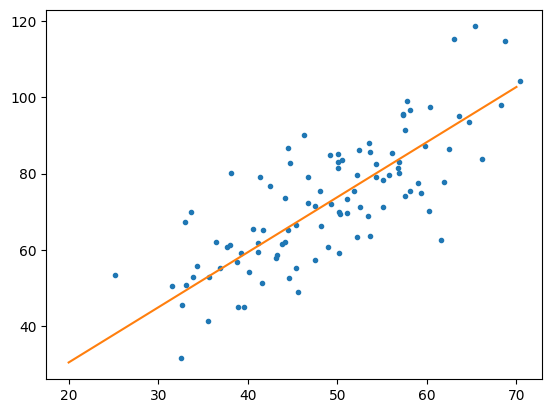

In [5]:
#损失函数
def Loss(func, xlist, ylist):
        result = 0.0
        for i in range(len(xlist)):
                result += (ylist[i] - func(xlist[i]))**2
        return result

#梯度下降法实现线性回归(父亲身高与子女身高)

#初始化
k = 1
b = 1
learningrate = 0.001
losshistory = []

#500次迭代
for i in range(500):
        
        #构造函数y = kx+b
        f = lambda x: k*x + b
        
        
        #计算数值导数
        #计算数值导数
        fk = lambda x: (k+0.01)*x + b
        fb = lambda x: k*x + b+0.01
        gradk = (Loss(fk, Xdata, Ydata) - Loss(f, Xdata, Ydata))/0.01
        gradb = (Loss(fb, Xdata, Ydata) - Loss(f, Xdata, Ydata))/0.01
        #更新参数
        k -= learningrate if gradk>0 else learningrate*-1
        b -= learningrate if gradb>0 else learningrate*-1
        
        losshistory.append(Loss(f, Xdata, Ydata))
#可视化
pl.plot(Xdata, Ydata, '.')
pl.plot(n := np.linspace(20,70), k*n + b, )






11188.80738962537


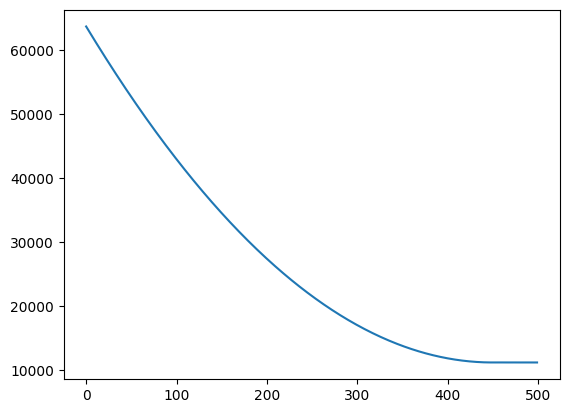

In [6]:
#学习曲线
print(losshistory[-1])
pl.plot(losshistory)

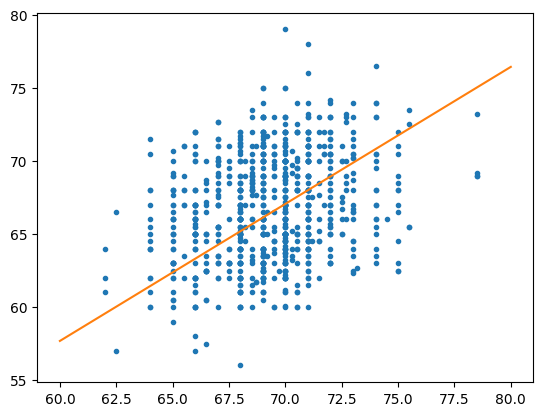

In [7]:
#梯度下降法实现线性回归

#损失函数
def Loss(func, xlist, ylist):
        result = 0.0
        for i in range(len(xlist)):
                result += (ylist[i] - func(xlist[i]))**2
        return result

#初始化
k = 1
b = 1
learningrate = 0.001
losshistory = []

#迭代500次
for i in range(500):
        
        #构造函数y = kx+b
        f = lambda x: k*x + b
        
        
        #对k,b求偏导      
        #计算数值导数
        fk = lambda x: (k+0.01)*x + b
        fb = lambda x: k*x + b+0.01
        gradk = (Loss(fk, fatherheight, kidheight) - Loss(f, fatherheight, kidheight))/0.01
        gradb = (Loss(fb, fatherheight, kidheight) - Loss(f, fatherheight, kidheight))/0.01
        
        #更新参数
        k -= learningrate if gradk>0 else learningrate*-1
        b -= learningrate if gradb>0 else learningrate*-1
        
        losshistory.append(Loss(f, fatherheight, kidheight))

#可视化
pl.plot(fatherheight,kidheight, '.')
pl.plot(n := np.linspace(60,80), k*n + b, )






In [1]:
#学习曲线

print(losshistory[-1])
pl.plot(losshistory)

NameError: name 'losshistory' is not defined

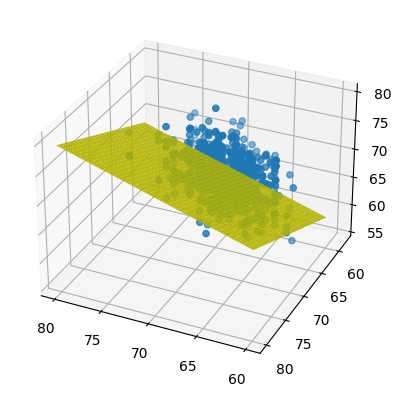

In [9]:
#梯度下降法实现二元线性回归

#初始化
w0 = 1
w1 = 1
w2 = 1
learningrate = 0.001
losshistory = []

#损失函数
def Loss(func, xlist, ylist, zlist):
        result = 0.0
        for i in range(len(xlist)):
                result += (zlist[i] - func(xlist[i], ylist[i]))**2
        return result



#迭代600次
for i in range(600):
        
        #构造z = w0 + w1*x1 + w2*x2
        f = lambda x1,x2: w0+w1*x1+w2*x2
        
        #对w0,w1,w2求偏导
        #计算数值导数
        fw0 = lambda x1,x2: (w0+0.01)+w1*x1+w2*x2
        fw1 = lambda x1,x2: w0+(w1+0.01)*x1+w2*x2
        fw2 = lambda x1,x2: w0+w1*x1+(w2+0.01)*x2
        gradw0 = (Loss(fw0, fatherheight,motherheight, kidheight) - Loss(f, fatherheight,motherheight, kidheight))/0.01
        gradw1 = (Loss(fw1, fatherheight,motherheight, kidheight) - Loss(f, fatherheight,motherheight, kidheight))/0.01
        gradw2 = (Loss(fw2, fatherheight,motherheight, kidheight) - Loss(f, fatherheight,motherheight, kidheight))/0.01

        #更新参数
        w0 -= learningrate if gradw0>0 else learningrate*-1
        w1 -= learningrate if gradw1>0 else learningrate*-1
        w2 -= learningrate if gradw2>0 else learningrate*-1
        
        losshistory.append(Loss(f, fatherheight,motherheight, kidheight))
        

#可视化
from mpl_toolkits import mplot3d
fig = pl.figure()
ax = pl.axes(projection='3d')
ax.scatter3D(fatherheight, motherheight, kidheight,  )
x1 = np.linspace(60,80,80)
x2 = np.linspace(60,80,80)
x, x2 = np.meshgrid(x1,x2)
ax.plot_surface(x1 ,x2,Z=w0+w1*x1+w2*x2, color = 'y' )
ax.view_init(30,115)
pl.show()





10686.504792480038


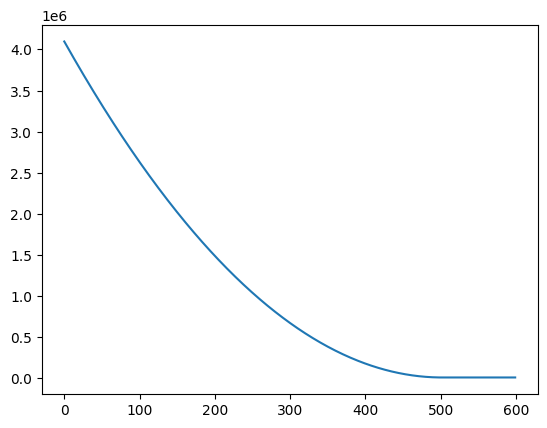

In [11]:
#学习曲线
print(losshistory[-1])
pl.plot(losshistory)

---------------